<a href="https://colab.research.google.com/github/meghanjukl-meg/ICTK_Internal-II/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

## Train Data set

In [2]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
train_data.duplicated().sum()

np.int64(0)

Handling Missing values

1.categorical data -> Mode

In [7]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [9]:
train_data['Credit_History']

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [10]:
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

2. Numerical data -> median

In [12]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())

Checking

In [13]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Data cleaning

In [14]:
train_data['Loan_ID'].nunique()

614

In [15]:
train_data.drop(['Loan_ID'],axis=1,inplace = True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Encoding

1.Label Encoding

In [16]:
cols = ['Gender','Married','Education','Self_Employed','Loan_Status']

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  train_data[col] = le.fit_transform(train_data[col])

2.one-hot Encoding

In [18]:
train_data = pd.get_dummies(train_data, columns=['Property_Area'],prefix= 'Area',dtype= int)

In [19]:
train_data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [20]:
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3)

In [21]:
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Dependents'] = pd.to_numeric(train_data['Dependents'])

In [22]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


Creating new Total income

In [23]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace = True)
train_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban,Total_Income
0,1,0,0,0,0,128.0,360.0,1.0,1,0,0,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,1,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,1,0,0,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,1,0,0,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,1,0,0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,1,1,0,0,2900.0
610,1,1,3,0,0,40.0,180.0,1.0,1,1,0,0,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,1,0,0,1,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,1,0,0,1,7583.0


Checking Outliers

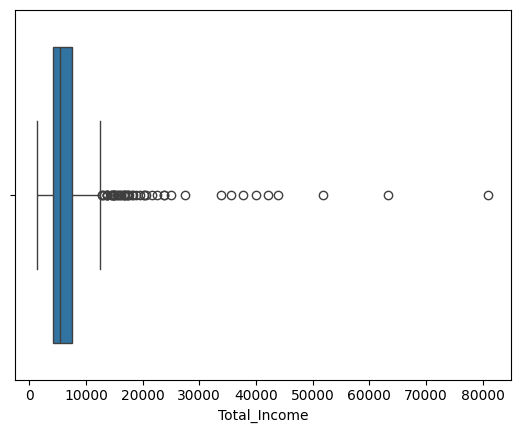

Number of outliers in Total_Income: 50


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_data['Total_Income'])
plt.show()

# (IQR)
Q1 = train_data['Total_Income'].quantile(0.25)
Q3 = train_data['Total_Income'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_data[(train_data['Total_Income'] < (Q1 - 1.5 * IQR)) | (train_data['Total_Income'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in Total_Income: {len(outliers)}")


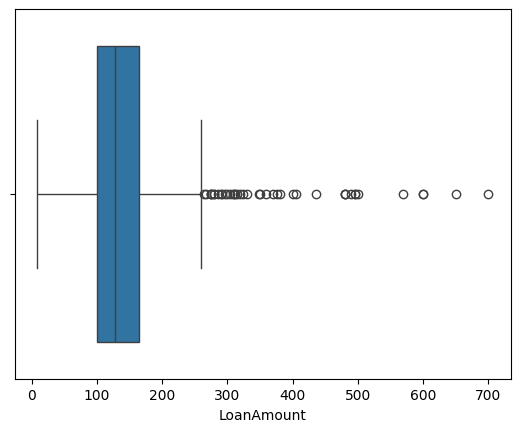

Number of outliers in LoanAmount: 41


In [25]:
sns.boxplot(x=train_data['LoanAmount'])
plt.show()

# (IQR)
Q1 = train_data['LoanAmount'].quantile(0.25)
Q3 = train_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_data[(train_data['LoanAmount'] < (Q1 - 1.5 * IQR)) | (train_data['LoanAmount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in LoanAmount: {len(outliers)}")


applying Log transform

In [26]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])

In [27]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban,Total_Income,Total_Income_log,LoanAmount_log
0,1,0,0,0,0,128.0,360.0,1.0,1,0,0,1,5849.0,8.674026,4.852030
1,1,1,1,0,0,128.0,360.0,1.0,0,1,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,66.0,360.0,1.0,1,0,0,1,3000.0,8.006368,4.189655
3,1,1,0,1,0,120.0,360.0,1.0,1,0,0,1,4941.0,8.505323,4.787492
4,1,0,0,0,0,141.0,360.0,1.0,1,0,0,1,6000.0,8.699515,4.948760


In [28]:
train_data.drop(['Total_Income', 'LoanAmount'], axis=1,inplace=True)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban,Total_Income_log,LoanAmount_log
0,1,0,0,0,0,360.0,1.0,1,0,0,1,8.674026,4.852030
1,1,1,1,0,0,360.0,1.0,0,1,0,0,8.714568,4.852030
2,1,1,0,0,1,360.0,1.0,1,0,0,1,8.006368,4.189655
3,1,1,0,1,0,360.0,1.0,1,0,0,1,8.505323,4.787492
4,1,0,0,0,0,360.0,1.0,1,0,0,1,8.699515,4.948760


Scaling

In [29]:
cols_to_scale = ['Total_Income_log', 'LoanAmount_log', 'Loan_Amount_Term', 'Dependents']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])
train_data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban,Total_Income_log,LoanAmount_log
0,1,0,-0.737806,0,0,0.273231,1.0,1,0,0,1,0.008468,-0.010533
1,1,1,0.253470,0,0,0.273231,1.0,0,1,0,0,0.082903,-0.010533
2,1,1,-0.737806,0,1,0.273231,1.0,1,0,0,1,-1.217363,-1.347068
3,1,1,-0.737806,1,0,0.273231,1.0,1,0,0,1,-0.301273,-0.140758
4,1,0,-0.737806,0,0,0.273231,1.0,1,0,0,1,0.055266,0.184647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,-0.737806,0,0,0.273231,1.0,1,1,0,0,-1.279607,-1.199718
610,1,1,2.236021,0,0,-2.522836,1.0,1,1,0,0,-0.641153,-2.357527
611,1,1,0.253470,0,0,0.273231,1.0,1,0,0,1,0.653699,1.364307
612,1,1,1.244745,0,0,0.273231,1.0,1,0,0,1,0.485168,0.754368


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    float64
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Loan_Status       614 non-null    int64  
 8   Area_Rural        614 non-null    int64  
 9   Area_Semiurban    614 non-null    int64  
 10  Area_Urban        614 non-null    int64  
 11  Total_Income_log  614 non-null    float64
 12  LoanAmount_log    614 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


Training

In [31]:
from sklearn.model_selection import train_test_split
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
l_model = LogisticRegression()
l_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = l_model.predict(X_test)

In [34]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]])

In [35]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('Recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

Accuracy 0.7886178861788617
Precision 0.7596153846153846
Recall 0.9875
f1_score 0.8586956521739131


Cross validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(l_model, X, y, cv=5)
print(f"Average CV Accuracy: {scores.mean():.2%}")

Average CV Accuracy: 80.95%


trying with Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]])

In [40]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('Recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

Accuracy 0.7886178861788617
Precision 0.7596153846153846
Recall 0.9875
f1_score 0.8586956521739131


Since both gave almost same result testing with Logistic Regression

Test Data set

In [48]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Saving Loan_ID to a variable for future use

In [49]:
test_ids = test_data['Loan_ID']

In [50]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


Handling Missing values

using mode from traindataset

In [55]:
t_data = pd.read_csv('/content/train_ctrUa4K.csv')

In [56]:
t_data['LoanAmount'] = t_data['LoanAmount'].fillna(t_data['LoanAmount'].median())

In [51]:
pd.set_option('future.no_silent_downcasting', True)

In [52]:
test_data['Gender'] = test_data['Gender'].fillna(train_data['Gender'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
test_data['Credit_History']=test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

In [57]:
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(t_data['LoanAmount'].median())

In [58]:
test_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


creating Total income

In [59]:
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

In [60]:
test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'Total_Income'], axis=1,inplace=True)

Encoding

In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           367 non-null    object 
 1   Gender            367 non-null    object 
 2   Married           367 non-null    object 
 3   Dependents        367 non-null    object 
 4   Education         367 non-null    object 
 5   Self_Employed     367 non-null    object 
 6   LoanAmount        367 non-null    float64
 7   Loan_Amount_Term  367 non-null    float64
 8   Credit_History    367 non-null    float64
 9   Property_Area     367 non-null    object 
 10  Total_Income_log  367 non-null    float64
dtypes: float64(4), object(7)
memory usage: 31.7+ KB


For the exact same numerical rules as your Training Set

In [66]:
test_data['Gender'] = test_data['Gender'].map({'Male': 1, 'Female': 0})
test_data['Married'] = test_data['Married'].map({'Yes': 1, 'No': 0})
test_data['Education'] = test_data['Education'].map({'Graduate': 0, 'Not Graduate': 1})
test_data['Self_Employed'] = test_data['Self_Employed'].map({'Yes': 1, 'No': 0})

In [68]:
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3).astype(float)

In [72]:
test_data = pd.get_dummies(test_data, columns=['Property_Area'],prefix= 'Area',dtype= int)

In [71]:
test_data.drop(['Loan_ID'],axis=1,inplace = True)

applying Log transform to loan amount
already did for total income

In [75]:
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [77]:
test_data.drop(['LoanAmount'],axis=1,inplace =True)

In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            356 non-null    float64
 1   Married           367 non-null    int64  
 2   Dependents        367 non-null    float64
 3   Education         367 non-null    int64  
 4   Self_Employed     344 non-null    float64
 5   Loan_Amount_Term  367 non-null    float64
 6   Credit_History    367 non-null    float64
 7   Total_Income_log  367 non-null    float64
 8   Area_Rural        367 non-null    int64  
 9   Area_Semiurban    367 non-null    int64  
 10  Area_Urban        367 non-null    int64  
 11  LoanAmount_log    367 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 34.5 KB


In [80]:
test_data['Gender'] = test_data['Gender'].fillna(train_data['Gender'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [81]:
test_data['Gender'] = test_data['Gender'].astype('int64')
test_data['Self_Employed'] = test_data['Self_Employed'].astype('int64')

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    int64  
 1   Married           367 non-null    int64  
 2   Dependents        367 non-null    float64
 3   Education         367 non-null    int64  
 4   Self_Employed     367 non-null    int64  
 5   Loan_Amount_Term  367 non-null    float64
 6   Credit_History    367 non-null    float64
 7   Total_Income_log  367 non-null    float64
 8   Area_Rural        367 non-null    int64  
 9   Area_Semiurban    367 non-null    int64  
 10  Area_Urban        367 non-null    int64  
 11  LoanAmount_log    367 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 34.5 KB


Scaling

In [83]:
cols_to_scale = ['Total_Income_log', 'LoanAmount_log', 'Loan_Amount_Term', 'Dependents']

Applying the PREVIOUSLY FITTED scaler

In [84]:
test_data[cols_to_scale] = scaler.transform(test_data[cols_to_scale])
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_log,Area_Rural,Area_Semiurban,Area_Urban,LoanAmount_log
0,1,1,-0.737806,0,0,0.273231,1.0,-0.032478,0,0,1,-0.316329
1,1,1,0.253470,0,0,0.273231,1.0,-0.442173,0,0,1,-0.042310
2,1,1,1.244745,0,0,0.273231,1.0,0.285068,0,0,1,0.969120
3,1,1,1.244745,0,0,0.273231,1.0,-0.321825,0,0,1,-0.508645
4,1,0,-0.737806,1,0,0.273231,1.0,-1.055774,0,0,1,-1.009987


In [85]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    int64  
 1   Married           367 non-null    int64  
 2   Dependents        367 non-null    float64
 3   Education         367 non-null    int64  
 4   Self_Employed     367 non-null    int64  
 5   Loan_Amount_Term  367 non-null    float64
 6   Credit_History    367 non-null    float64
 7   Total_Income_log  367 non-null    float64
 8   Area_Rural        367 non-null    int64  
 9   Area_Semiurban    367 non-null    int64  
 10  Area_Urban        367 non-null    int64  
 11  LoanAmount_log    367 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 34.5 KB


Reordering cols

In [86]:
X_test_final = test_data[X_train.columns]
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    int64  
 1   Married           367 non-null    int64  
 2   Dependents        367 non-null    float64
 3   Education         367 non-null    int64  
 4   Self_Employed     367 non-null    int64  
 5   Loan_Amount_Term  367 non-null    float64
 6   Credit_History    367 non-null    float64
 7   Area_Rural        367 non-null    int64  
 8   Area_Semiurban    367 non-null    int64  
 9   Area_Urban        367 non-null    int64  
 10  Total_Income_log  367 non-null    float64
 11  LoanAmount_log    367 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 34.5 KB


Generating Predictions


In [88]:
final_predictions = l_model.predict(X_test_final)
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

Mapping back to Y and N

In [89]:
prediction_labels = pd.Series(final_predictions).map({1: 'Y', 0: 'N'})

In [90]:
prediction_labels

,0
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


Creating Submission file

In [92]:
submission = pd.DataFrame({
    'Loan_ID': test_ids,
    'Loan_Status': prediction_labels
})

In [93]:
submission.to_csv('Submission.csv', index=False)

Loading the submission file

In [94]:
submission = pd.read_csv('/content/Submission.csv')
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
